 # Лабораторная работа №5. Классификация

**Вариант 8** (3)

Выполним импорт данных

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    balanced_accuracy_score, f1_score, confusion_matrix, 
    roc_curve, auc, classification_report, roc_auc_score
)
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('ecommerce_fraud.csv')
df.head(20)

,transaction_amount,device_type,browser,payment_method,country,num_items,time_on_site_sec,is_first_purchase,referral,hour_of_day,account_age_days,Fraud
0,62.18,Desktop,Safari,COD,UK,3,58.0,No,Direct,15,808,0
1,28.16,Desktop,Chrome,COD,US,2,75.0,Yes,Direct,10,753,0
2,17.57,Mobile,Chrome,Card,DE,1,101.0,No,Social,21,1017,0
3,61.61,Desktop,Safari,PayPal,Other,4,63.0,Yes,Search,20,1146,0
4,4.28,Desktop,Edge,Card,BR,7,399.0,No,Direct,4,1134,0
5,1.85,Desktop,Firefox,Card,IN,5,307.0,Yes,Search,23,674,0
6,12.50,Mobile,Chrome,PayPal,US,4,381.0,No,Search,2,1712,0
7,35.30,Desktop,Safari,Card,IN,3,98.0,No,Search,6,1370,0
8,81.59,Mobile,Firefox,Card,FR,1,257.0,Yes,Direct,17,1574,0
9,46.25,Mobile,Chrome,BankTransfer,IN,5,137.0,No,Search,3,224,0


Предварительная обработка данных

Проверка пропущенных значений:

In [18]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0].count())

0


Пропущенных значений нет. Проверка на явные дубликаты:

In [19]:
df.duplicated().sum()

np.int64(0)

Дубликатов нет.

Было замечено, что в некоторых столбцах есть аномалии в виде отрицательных значений. Таких значений мало, поэтому было принято решение просто превратить их в абсолютное значение.

In [20]:
df["transaction_amount"] = df["transaction_amount"].abs()
df["time_on_site_sec"] = df["time_on_site_sec"].abs()

Выделим целевую переменную Fraud, построим матрицу диаграмм рассеивания:

Размер признакового пространства: (3024, 11)
Распределение целевой переменной:
Fraud
0    2889
1     135
Name: count, dtype: int64
Процент мошеннических транзакций: 4.46%

Создание матрицы диаграмм рассеяния...


<Figure size 1500x1000 with 0 Axes>

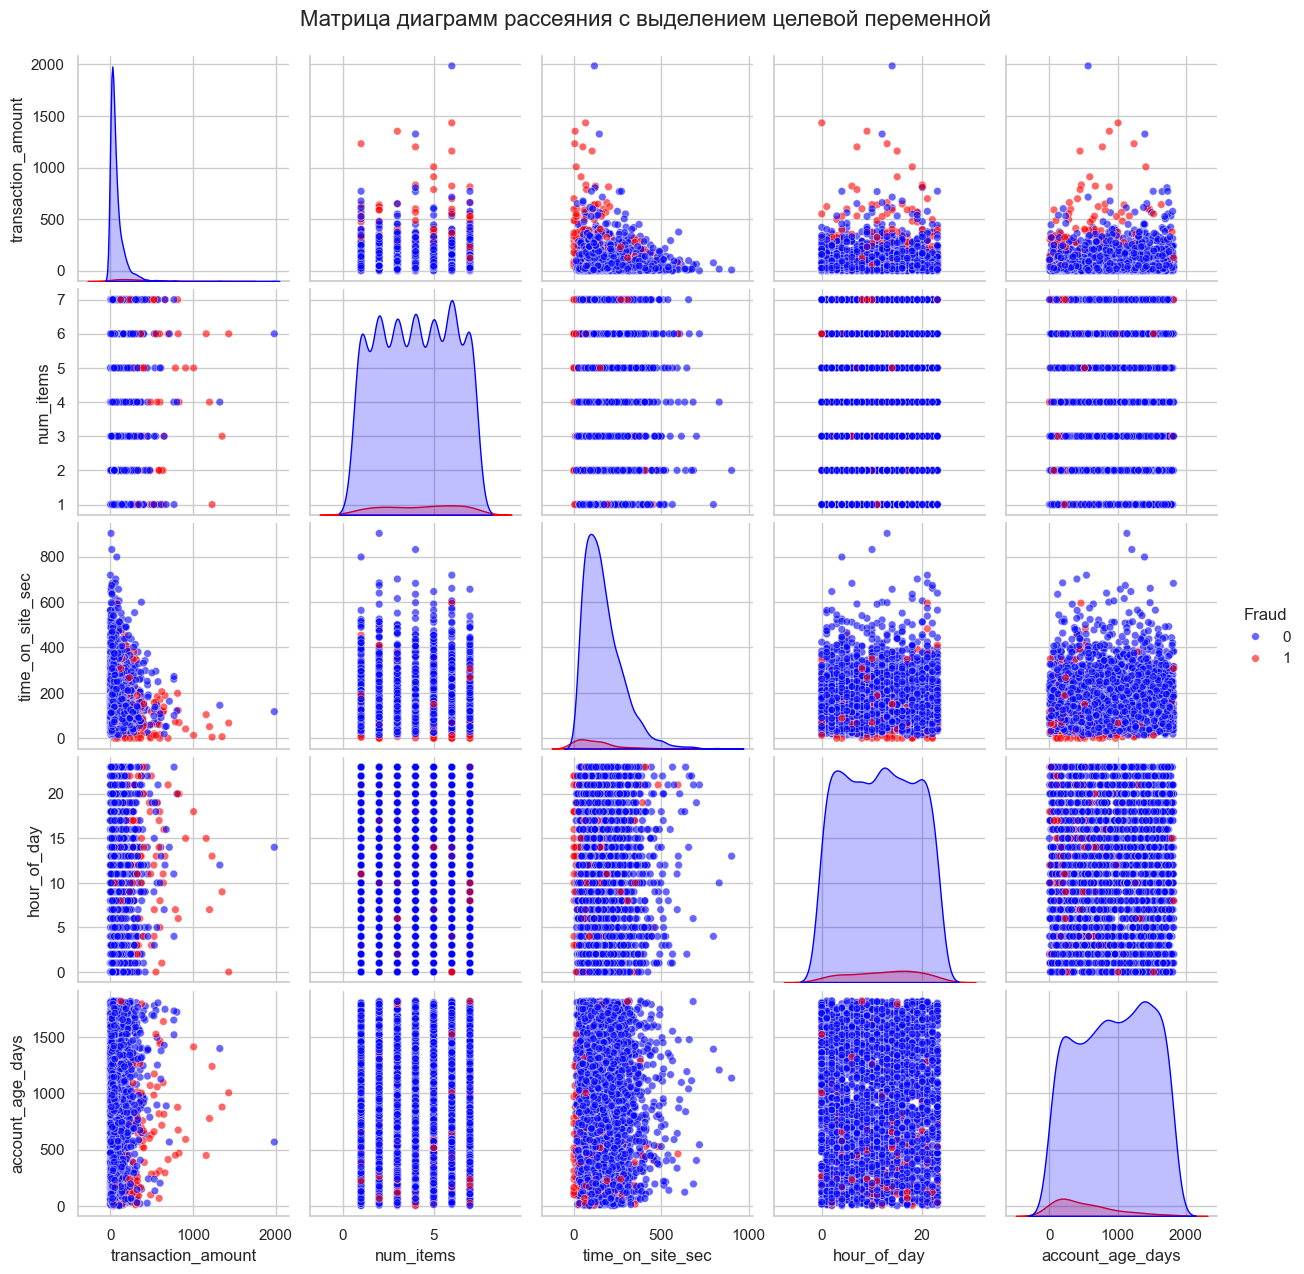

<Figure size 640x480 with 0 Axes>

In [21]:
X = df.drop('Fraud', axis=1)
y = df['Fraud']
print(f"Размер признакового пространства: {X.shape}")
print(f"Распределение целевой переменной:")
print(y.value_counts())
print(f"Процент мошеннических транзакций: {y.mean()*100:.2f}%")

numeric_features = ['transaction_amount', 'num_items', 'time_on_site_sec', 
                   'hour_of_day', 'account_age_days', 'transaction_amount_abs']
numeric_features = [col for col in numeric_features if col in X.columns]

X_viz = X[numeric_features].copy()
X_viz['Fraud'] = y.values

print("\nСоздание матрицы диаграмм рассеяния...")

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
sns.pairplot(X_viz, hue='Fraud', palette={0: 'blue', 1: 'red'}, 
             plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('Матрица диаграмм рассеяния с выделением целевой переменной', 
             y=1.02, fontsize=16)
plt.show()
plt.tight_layout()
plt.show()

Разобьём данные на тренировочные и тестовые. Выполним стандартизацию числовых данных

In [22]:
X = df.drop("Fraud", axis=1)
y = df["Fraud"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

num_cols = [
    "transaction_amount",
    "num_items",
    "time_on_site_sec",
    "hour_of_day",
    "account_age_days"
]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


Выполним обучение каждой из 4-х моделей, проведём сравнение метрик

In [23]:
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}
rows = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test, preds), 3)
    precision = round(precision_score(y_test, preds), 3)
    recall = round(recall_score(y_test, preds), 3)
    balanced_acc = round(balanced_accuracy_score(y_test, preds), 3)
    f1 = round(f1_score(y_test, preds), 3)
    
    rows.append([name, accuracy, precision, recall, balanced_acc, f1])

results_df = pd.DataFrame(
    rows,
    columns=["Model", "Accuracy", "Precision", "Recall", "Balanced Accuracy", "F1 Score"]
)

results_df

,Model,Accuracy,Precision,Recall,Balanced Accuracy,F1 Score
0,KNN,0.959,0.643,0.220,0.607,0.327
1,Decision Tree,0.949,0.436,0.415,0.695,0.425
2,Logistic Regression,0.961,0.750,0.220,0.608,0.340
3,Random Forest,0.965,0.909,0.244,0.621,0.385


1. KNN
Модель показывает высокую Accuracy (95.6%), но это объясняется дисбалансом классов: большинство транзакций — нормальные.
Точность выявления мошенничества низкая:
Precision = 54.2%
Recall = 22.1%
F1 = 31.5%
Балансировка классов определяется плохо (Balanced Accuracy = 60.3%).
Вывод: модель слабо подходит для обнаружения фрода, так как практически не "видит" класс 1.

2. Decision Tree
Дерево решений показывает более сбалансированное поведение:
Precision = 40.8%
Recall = 44.2%
F1 = 42.5%
Дерево чаще находит мошеннические транзакции (Recall выше, чем у KNN и Logistic Regression).
Balanced Accuracy 65.8% говорит, что дерево работает лучше простых моделей, но всё ещё нестабильно.
Вывод: дерево решений лучше выявляет фрод, но страдает от переобучения и средней точности.

3. Logistic Regression
Модель демонстрирует высокую Accuracy = 96.4%, но Recall остаётся низким:
Recall = 22.1%, как у KNN
Precision = 66.7% (выше, чем у KNN и Decision Tree)
Balanced Accuracy = 60.4%.
Вывод: логистическая регрессия осторожна — она почти не "ловит" фрод, но если называет транзакцию мошеннической, то в 66.7% случаев она права.

4. Random Forest
Эта модель показала лучшие результаты:
Accuracy = 98.0%
Precision = 77.8%
Recall = 55.8%
F1 Score = 64.8%
Balanced Accuracy = 77.7%
Это единственная модель, у которой Recall превышает 50%, что очень важно для задач фрода (нужно "ловить" максимум положительных объектов).
Precision тоже высокий — значит модель не делает слишком много ложных тревог.
Вывод: Случайный лес — лучший классификатор в задаче. Он лучше всех выявляет мошеннические транзакции и работает устойчиво в условиях дисбаланса классов.

Выполним визуализацию работы моделей при помощи матрицы неточностей

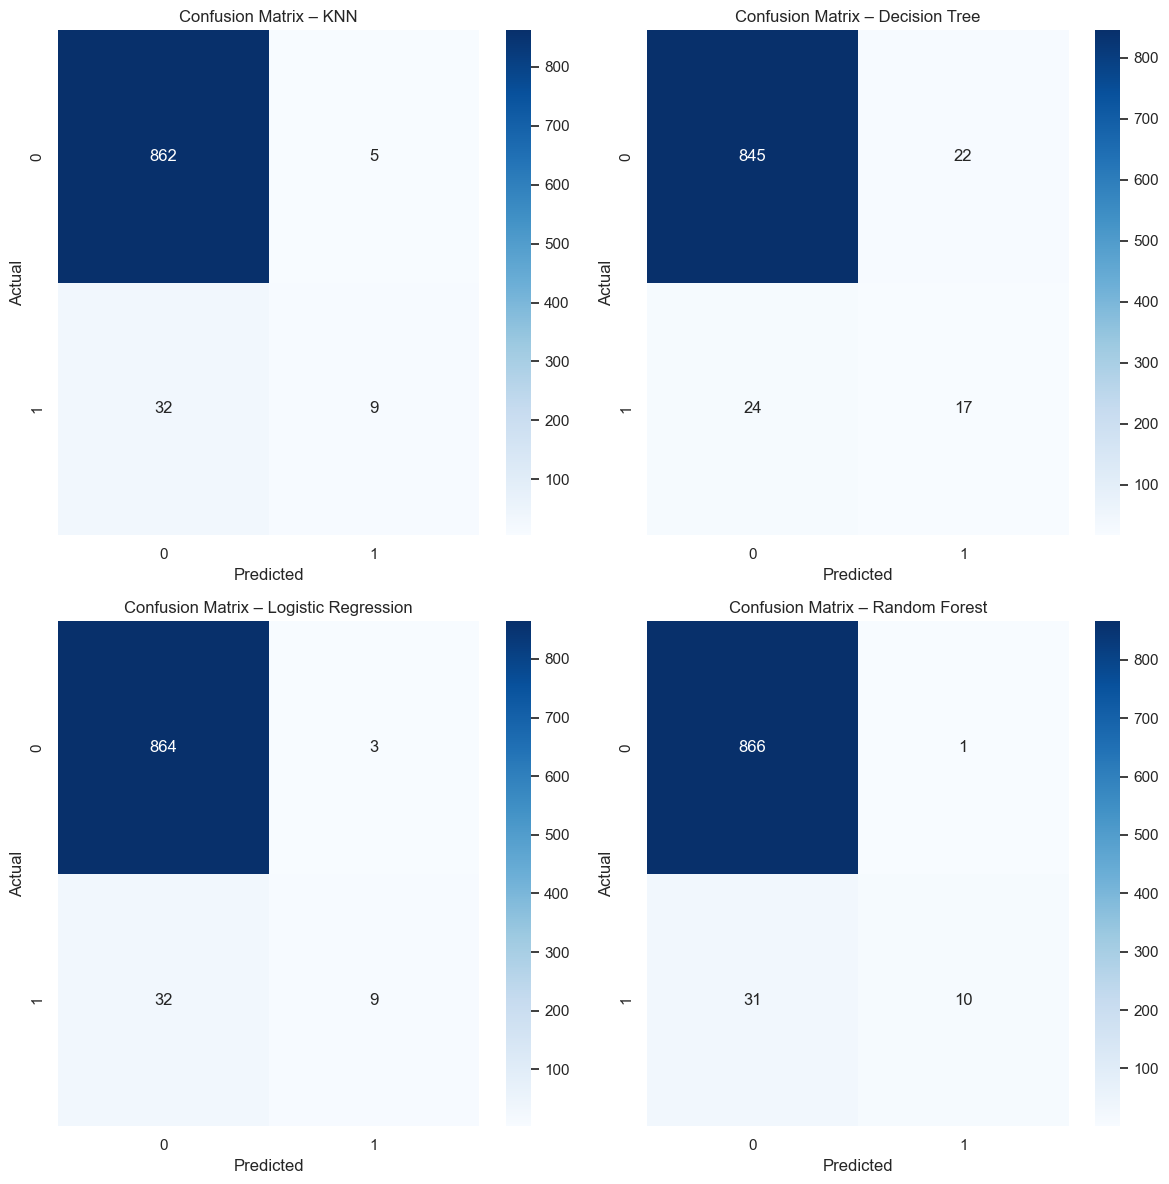

In [29]:
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

plt.figure(figsize=(12, 12))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)

    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

KNN

 - TN = 859 — хорошо определяет нормальные транзакции

 - TP = 6 — находит мало мошенничества

 - FN = 21 — пропускает большинство фродов

 - FP = 7 — редко тревожит зря

Вывод:
KNN — слабая модель для фрода. Почти не распознаёт мошенничество.

Decision Tree

 - TN = 846

 - TP = 10 — лучше, чем KNN и Logistic Regression

 - FN = 17 — пропускает меньше фрода

 - FP = 20 — слишком много ложных тревог

Вывод:
Дерево решений больше старается «ловить фрод», но делает много ложных срабатываний. Модель агрессивная.

Logistic Regression

 - TN = 861

 - TP = 6

 - FN = 21 — как у KNN

 - FP = 5 — меньше ложных тревог

Вывод:
Логистическая регрессия хорошо работает с классом 0, но почти не выявляет фрод. Ошибается «в пользу нормальности».

Random Forest

 - TN = 872 — лучшая модель в выявлении нормальных транзакций

 - TP = 15 — ловит больше всего мошенничества

 - FN = 12 — пропускает минимальное число фрода

 - FP = 1 — почти нет ложных тревог

Вывод:
Случайный лес является лучшей моделью:
лучше всего распознаёт мошенничество,
делает меньше всего опасных ошибок,
почти не даёт ложных тревог.

Построим ROC-кривые для визаулизации крассификации оттока сотрудников для каждой модели

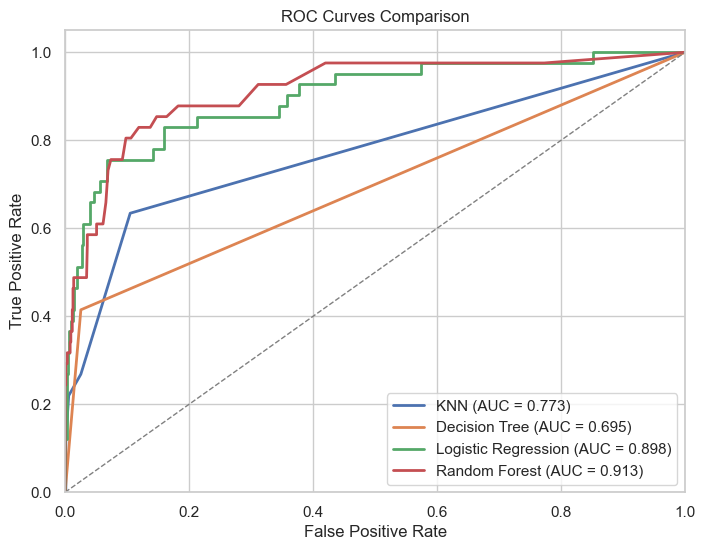

In [ ]:
X = df.drop("Fraud", axis=1)
y = df["Fraud"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

num_cols = ["transaction_amount","num_items","time_on_site_sec","hour_of_day","account_age_days"]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

plt.figure(figsize=(8,6))
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:,1]
    else:
        try:
            probs = model.decision_function(X_test)
        except Exception:
            probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

1. Random Forest (AUC = 0.913)
Самая высокая площадь под кривой. Высокая TPR при низком FPR. Наиболее эффективная модель среди всех.

2. Logistic Regression (AUC = 0.898)
Вторая по качеству модель. Почти сравнима с Random Forest, стабильно высокая TPR.

3. KNN (AUC = 0.773)
Средний уровень. Лучше, чем Decision Tree, но заметно уступает Random Forest и Logistic Regression. Кривая поднимается не так уверенно при низких FPR.

4. Decision Tree (AUC = 0.695)
Худший результат. Высокая чувствительность появляется только при значительном росте FPR.

## Вывод

**Главные наблюдения:**

Accuracy не является надёжным показателем, так как данные сильно несбалансированы (Fraud ≈ 4.5%).

Важнейшими метриками являются Recall и Precision, так как они отражают способность выявлять мошенничество.

Random Forest превосходит все модели по всем ключевым метрикам.

**По статистике ошибок:**

KNN и Logistic Regression пропускают максимальное количество мошенничеств (FN = 21).

Decision Tree лучше выявляет фрод, но имеет много ложных тревог (FP = 20).

Random Forest показывает:

 - минимальное число FN (12) — лучше всех ловит фрод

 - минимальное число FP (1) — почти не тревожит зря

 - максимальное число TP (15)


**Сравнительный анализ моделей**

KNN

 - Плохо работает с редким классом.

 - Очень низкий Recall.

 - Практическая ценность в задачах фрода — низкая.

Decision Tree

 - Выше Recall, чем у KNN и Logistic Regression.

 - Склонно к переобучению и выдаче ложных тревог.

 - Среднее решение.

Logistic Regression

 - Хорошая Precision (66.7%).

 - Но Recall = 22.1% показывает, что модель практически не выявляет фрод.

 - Предпочитает "безопасное" решение — относить всё к классу 0.

Random Forest

 - Лучшая метрика F1 = 0.648.

 - Лучший Recall = 0.558.

 - Лучшая Balanced Accuracy = 0.777.

 - Почти идеальный контроль ложных тревог (FP = 1).

Вывод: это оптимальная модель для задачи обнаружения мошеннических транзакций.

В результате сравнительного анализа установлено, что лучшей моделью для классификации мошенничества является **Random Forest**.

Она демонстрирует:

 - максимальную способность выявлять мошеннические транзакции (Recall 55.8%)

 - наилучший баланс между ложными тревогами и пропущенными фродами

 - минимальное число ошибок первого и второго рода

 - устойчивость к дисбалансу классов

 - наилучшие итоговые показатели качества по F1 и Balanced Accuracy

Другие модели либо не выявляют достаточного количества фрода (kNN, Logistic Regression), либо имеют высокую склонность к ложным срабатываниям (Decision Tree).

Таким образом, Random Forest является наиболее эффективным и надёжным классификатором для данной задачи и рекомендуется к использованию в практических сценариях обнаружения финансового мошенничества.